In [43]:
import nidaqmx
import numpy as np
from nidaqmx.stream_readers import AnalogMultiChannelReader
from nidaqmx.constants import AcquisitionType 
import time
import matplotlib.pyplot as plt

In [72]:
sampling_rate_write = 100
sampling_rate_read = 50000

task_read = nidaqmx.Task()
task_read.ai_channels.add_ai_voltage_chan("cDAQ1Mod1/ai0")
task_read.timing.cfg_samp_clk_timing(sampling_rate_read)


task_write = nidaqmx.Task()
task_write.ao_channels.add_ao_voltage_chan("cDAQ1Mod2/ao0",'output', -2, 2)
task_write.timing.cfg_samp_clk_timing(sampling_rate_write)

start=0; stop=20; increment=1

sample_rate = 44100 
sampling_interval = 1/sample_rate

freq = 100
omega = 2*np.pi*freq
amplitude = 1
t = np.arange(0, 1, sampling_interval)
data = amplitude*np.sin(omega*t)

arr = []


for k in range(start, stop, increment):
    #data = 1.5*np.ones(2)

    task_write.write(data)
    task_write.start()
    

    #time.sleep(1/sampling_rate)
    task_read.start()
    value = task_read.read(number_of_samples_per_channel = 1)
    arr.append(value)
    
    print(value)
    
    task_read.wait_until_done()
    task_write.wait_until_done()
    
    task_read.stop()
    task_write.stop() 

  
#task_write.stop()
task_write.close()
#task_read.stop()
task_read.close()

[-0.987008071941]
[0.605394167067]
[0.75078805774]
[0.751083728984]
[0.728340867945]
[0.857527820388]
[0.843853636244]
[0.775587788776]
[0.752019613996]
[0.861479063376]
[0.8023839116]
[0.909311217785]
[0.640593706487]
[0.650630034726]
[0.654729113336]
[0.6538732550449999]
[0.7661434139159999]
[0.799042948721]
[0.766147079262]
[0.714277546234]


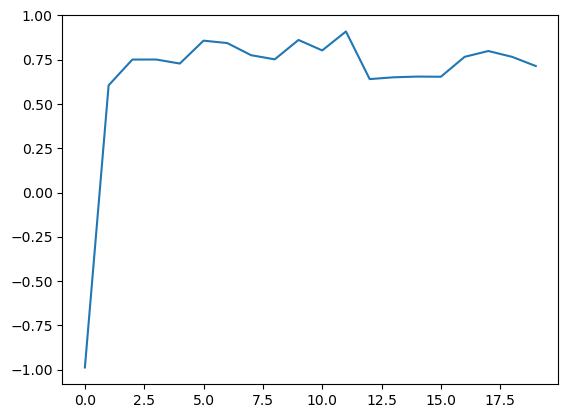

/home/ian/anaconda3/lib/python3.9/site-packages/nidaqmx/task.py:98: ResourceWarning: Task of name "_unnamedTask<52>" was not explicitly closed before it was destructed. Resources on the task device may still be reserved.
  warnings.warn(
/home/ian/anaconda3/lib/python3.9/site-packages/nidaqmx/task.py:98: ResourceWarning: Task of name "_unnamedTask<53>" was not explicitly closed before it was destructed. Resources on the task device may still be reserved.
  warnings.warn(
/home/ian/anaconda3/lib/python3.9/site-packages/nidaqmx/task.py:98: ResourceWarning: Task of name "_unnamedTask<51>" was not explicitly closed before it was destructed. Resources on the task device may still be reserved.
  warnings.warn(


In [73]:
plt.plot(arr)

In [41]:
with nidaqmx.Task() as task:
#, nidaqmx.Task() as samp_clk_task:
    
    sampling_rate = 44100
    
    
    task.ai_channels.add_ai_voltage_chan("cDAQ1Mod1/ai0")
    #samp_clk_task.ai_channels.add_ai_chan('cDAQ1Mod1/ai0')
    
    task.timing.cfg_samp_clk_timing(sampling_rate)

    

    hibs = task.read()

In [28]:
print(hibs)
print(type(hibs))

-0.183943592052
<class 'float'>


In [20]:
with nidaqmx.Task() as task:
#, nidaqmx.Task() as samp_clk_task:
    
    sampling_rate = 10000
    
    data = np.empty([1,10000])
    reader = AnalogMultiChannelReader(task.in_stream)
    
    task.ai_channels.add_ai_voltage_chan("cDAQ1Mod1/ai0")
    #samp_clk_task.ai_channels.add_ai_chan('cDAQ1Mod1/ai0')
    
    task.timing.cfg_samp_clk_timing(sampling_rate, source="",
                                     sample_mode=AcquisitionType.CONTINUOUS, samps_per_chan=10000)
    reader = AnalogMultiChannelReader(task.in_stream)
    
   

    hibs = reader.read_many_sample(data,number_of_samples_per_channel = 10000)#
        

In [6]:
import nidaqmx.system

system = nidaqmx.system.System.local()
print(system.driver_version)
# DriverVersion(major_version=17L, minor_version=1L, update_version=0L)

for device in system.devices:
    print(device)

DriverVersion(major_version=22, minor_version=5, update_version=0)
Device(name=cDAQ1)
Device(name=cDAQ1Mod1)
Device(name=cDAQ1Mod2)


In [ ]:

import pprint
import nidaqmx

pp = pprint.PrettyPrinter(indent=4)

with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan("cDAQ1Mod1/ai0")
    task.timing.cfg_samp_clk_timing(sampling_rate)
    in_stream = task.in_stream

    print('1 Channel 1 Sample Read Raw: ')
    data = in_stream.read(number_of_samples_per_channel=1)
    pp.pprint(data)

    print('1 Channel N Samples Read Raw: ')
    data = in_stream.read(number_of_samples_per_channel=8)
    pp.pprint(data)
    
    task.wait_until_done()
    task.stop()

    task.ai_channels.add_ai_voltage_chan("cDAQ1Mod1/ai1:3")
    

    print('N Channel 1 Sample Read Raw: ')
    data = in_stream.read(number_of_samples_per_channel=1)
    pp.pprint(data)

    print('N Channel N Samples Read Raw: ')
    data = in_stream.read(number_of_samples_per_channel=8)
    pp.pprint(data)
    
    task.wait_until_done()
    task.stop()

In [50]:
data = 1.5*np.ones(2)

In [51]:
data

array([1.5, 1.5])